In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from final_model_log_scale import WAE,AudioDataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
motu = AudioDataset("../notebooks/motu/motu_dataset/*.wav", process=False, slice_size=128)
model = WAE(4, 128)
model.eval()

WAE(
  (act): LeakyReLU(negative_slope=0.01)
  (dconv1): Conv2d(256, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (dconv2): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (dconv3): Conv2d(64, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (dconv4): Conv2d(32, 4, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (dconv_logvar): Conv2d(4, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (dconv_mean): Conv2d(4, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (e1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(

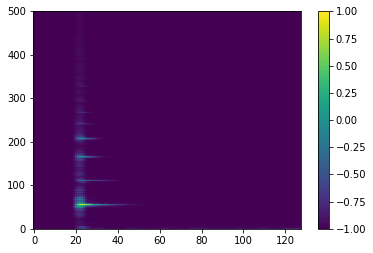

In [3]:
plt.imshow(motu[4][0].numpy(), aspect="auto", origin="lower")
plt.colorbar()

In [4]:
z = model.encode(motu[3][0].unsqueeze(0))
print(z.size())

torch.Size([1, 4])


In [5]:
mean, logvar = model.decode(z, torch.randn([1,7]), torch.randn([1,12]))

In [6]:
mean, logvar = model(motu[3][0].unsqueeze(0), torch.randn([1,7]), torch.randn([1,12]))

In [7]:
print(mean.size(), logvar.size())

torch.Size([1, 500, 128]) torch.Size([1, 500, 128])


In [15]:
f = 27.5*(2**(np.arange(88)/12))

In [23]:
f0 = 419

In [24]:
idx = np.argmin(abs(f-f0))

In [9]:
S, o, s = motu[3]